In [693]:
import numpy as np
import matplotlib.pyplot as plt
import math as m

from scipy.optimize import curve_fit
from scipy import asarray as ar,exp

In [729]:
nt_len = 720 #number of time steps
dt = 300.0 #Size of time each time step in seconds
fCor = 0.0001 #strength of the correalis force

u_ana = np.zeros((nt_len)) #an array for the analytical solution
u = np.zeros((nt_len)) #an array for the u of the numerical solution
v = np.zeros((nt_len)) #an array for the v of the numerical solution
time = np.zeros((nt_len)) #an array for the time steps

In [730]:
#Euler forward time loop
KElp = np.zeros((nt_len))

u[0]=10.0 #setting the start position of u for the numerical solution
u_ana[0]=10.0 #setting the start position of u for the analytical solution

for nt in range(1,nt_len): #time loop over the aount of time steps
    time[nt] = time[nt-1]+dt #filling the time array with all consecutive time steps 
    u[nt] = u[nt-1] + (fCor * v[nt-1] * dt) #Euler forward equation for u
    v[nt] = v[nt-1] - (fCor * u[nt-1] * dt) #Euler forward equation for v
    u_ana[nt] = u[0] * m.cos(fCor * time[nt]) #Creating the analytical solution with the built in cosine
    KE[nt] = .5*(v[nt]**2+u[nt]**2)

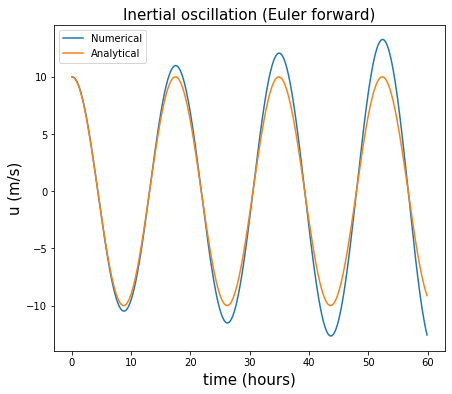

In [585]:
#Euler forward graph
plt.figure(figsize=(7,6))
plt.xlabel('time (hours)',fontsize=15)
plt.ylabel('u (m/s)',fontsize=15)
plt.title('Inertial oscillation (Euler forward)',fontsize=15)
plt.plot(time/3600, u,label='Numerical')
plt.plot(time/3600, u_ana,label='Analytical')
plt.legend()
plt.show()

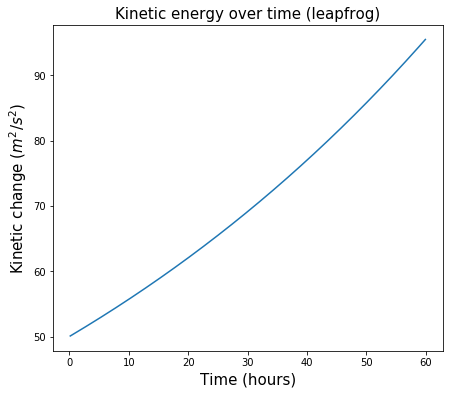

In [586]:
#Euler energy graph

plt.figure(figsize=(7,6))
plt.title('Kinetic energy over time (leapfrog)',fontsize=15)
plt.plot(time[2:720]/3600,(KE[2:720]))
plt.ylabel('Kinetic change ($m^2/s^2$)',fontsize=15)
plt.xlabel('Time (hours)',fontsize=15)
plt.show()

In [587]:
ulp = np.zeros((2*nt_len))
vlp = np.zeros((2*nt_len))
KElp = np.zeros((2*nt_len))
timelp = np.zeros((2*nt_len)) #an array for the time steps
ulp[0]=10.0

#initialize first step with Euler forward
timelp[1] = timelp[0] +dt/2
ulp[1] = ulp[0] + (fCor *vlp[0]*dt/2)
vlp[1] = vlp[0] - (fCor *ulp[0]*dt/2)
for nt in range(1,2*nt_len-1):
    timelp[nt+1] = timelp[nt-1] +dt
    ulp[nt+1] = ulp[nt-1] + (fCor *vlp[nt]*dt)
    vlp[nt+1] = vlp[nt-1] - (fCor *ulp[nt]*dt)
    KElp[nt+1] = .5*(vlp[nt]**2+ulp[nt]**2)

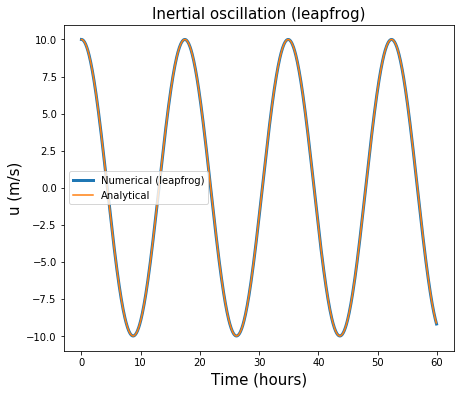

In [588]:
#Leapfrog graph
plt.figure(figsize=(7,6))
plt.xlabel('Time (hours)',fontsize=15)
plt.ylabel('u (m/s)',fontsize=15)
plt.title('Inertial oscillation (leapfrog)',fontsize=15)
plt.plot(timelp/3600, ulp,label='Numerical (leapfrog)', linewidth=3)
plt.plot(time/3600, u_ana,label='Analytical')
plt.legend()
plt.show()

In [38]:
for i in []

300.0

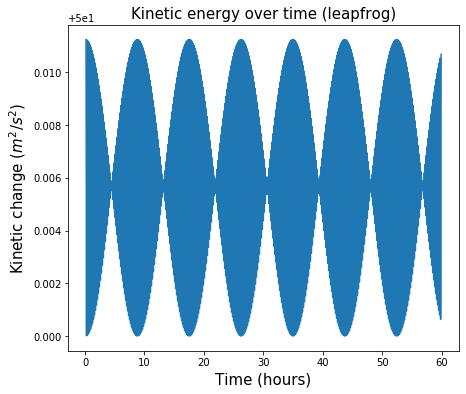

In [499]:
#Leapfrog energy graph

plt.figure(figsize=(7,6))
plt.title('Kinetic energy over time (leapfrog)',fontsize=15)
plt.plot(time[2:720]/3600,(KElp[2:720]))
plt.ylabel('Kinetic change ($m^2/s^2$)',fontsize=15)
plt.xlabel('Time (hours)',fontsize=15)
plt.show()

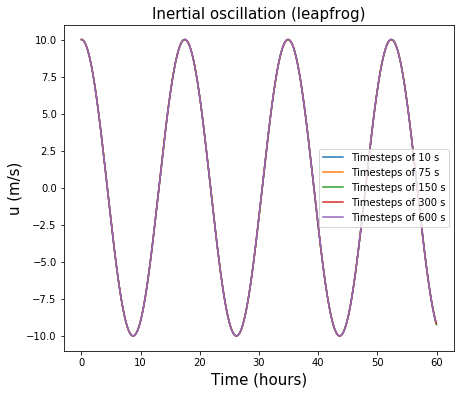

In [518]:
# For 5 different time steps:
plt.figure(figsize=(7,6))
plt.xlabel('Time (hours)',fontsize=15)
plt.ylabel('u (m/s)',fontsize=15)
plt.title('Inertial oscillation (leapfrog)',fontsize=15)

timesteps=[10,75,150,300,600]
KElist=[]
for dt in timesteps:
    nt_len=2*int(60*3600/dt)
    timelp = np.zeros((nt_len)) #an array for the time steps
    ulp = np.zeros((nt_len))
    vlp = np.zeros((nt_len))
    KElp = np.zeros((nt_len))
    ulp[0]=10.0
    #initialize first step with Euler forward
    
    timelp[1] = timelp[0] +dt/2
    ulp[1] = ulp[0] + (fCor *vlp[0]*dt/2)
    vlp[1] = vlp[0] - (fCor *ulp[0]*dt/2)

    for nt in range(1,nt_len-1):
        
        timelp[nt+1] = timelp[nt-1] +dt
        ulp[nt+1] = ulp[nt-1] + (fCor *vlp[nt]*dt)
        vlp[nt+1] = vlp[nt-1] - (fCor *ulp[nt]*dt)
        KElp[nt+1] = .5*(vlp[nt]**2+ulp[nt]**2)

    KElist.append(np.mean(KElp[nt_len-100:nt_len-1]))
    plt.plot(timelp[0:nt_len-1]/3600, ulp[0:nt_len-1],label='Timesteps of '+str(dt)+' s')
plt.legend()
plt.show()

In [373]:


xdata=np.array(timesteps)
ydata=np.array(KElist)*2
xlist=np.arange(2,600,1)

def fit(x,a,b,c,d):
    return a+b*x+c*x**2+d*x**3
popt, pcov = curve_fit(fit,xdata,ydata,p0=[0,0,0,0])
residuals = ydata- fit(xdata, *popt)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((ydata-np.mean(ydata))**2)
r_squared = 1 - (ss_res / ss_tot)

def fit2(x,a,b):
    return a+b*x
popt2, pcov2 = curve_fit(fit2,xdata,ydata,p0=[0,1])
residuals2 = ydata- fit2(xdata, *popt2)
ss_res2 = np.sum(residuals2**2)
ss_tot2 = np.sum((ydata-np.mean(ydata))**2)
r_squared2 = 1 - (ss_res2 / ss_tot2)



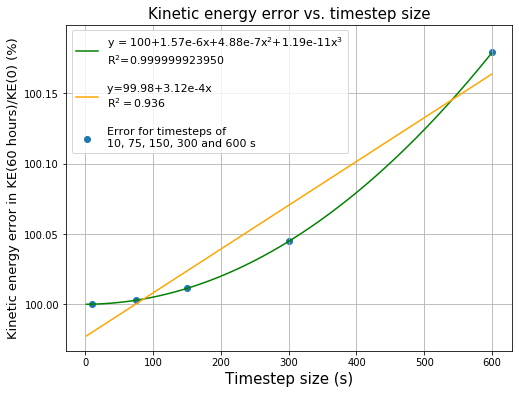

In [672]:
plt.figure(figsize=(8,6))
plt.title('Kinetic energy error vs. timestep size',fontsize=15)
plt.scatter(xdata,ydata, label='Error for timesteps of \n10, 75, 150, 300 and 600 s')
plt.plot(xlist,fit(xlist,*popt),'green',label='y = 100+1.57e‐6x+4.88e‐7x$^2$+1.19e‐11x$^3$ \nR$^{2}$=0.999999923950')
plt.plot(xlist,fit2(xlist,*popt2),'orange',label='\ny=99.98+3.12e‐4x \nR$^2=0.936$\n')
plt.xlabel('Timestep size (s)',fontsize=15)
plt.ylabel('Kinetic energy error in KE(60 hours)/KE(0) (%)',fontsize=13)
# these are matplotlib.patch.Patch properties
#props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
#textbox='$y=a+bx+cx^2+dx^3$ \n a=100, b=1.57e-6, \n $c=4.88e-7$, d=1.19e-11 \n $R^{2}$=0.999999923950'
# place a text box in upper left in axes coords
#plt.text(270, 100.19, textbox, fontsize=11,
#        verticalalignment='top', horizontalalignment='right', bbox=props)
plt.legend(fontsize=11)
#add text with custom font
plt.grid()
plt.show()

#You can get the residual sum of squares (ss_tot) with


In [681]:
#Matsuno / Euler backward time loop
dt=300
nt_len=int(60*3600/dt)
uma = np.zeros((nt_len))
vma = np.zeros((nt_len))
KEma = np.zeros((nt_len-1))
timema = np.zeros((nt_len))
uma[0]=10.0


for nt in range(1,nt_len-1):
    timema[nt]=timema[nt-1]+dt
    uma[nt] = uma[nt-1] + (fCor * vma[nt-1] * dt)
    vma[nt] = vma[nt-1] - (fCor * uma[nt-1] * dt)
    uma[nt] = uma[nt-1] + (fCor * vma[nt] * dt)
    vma[nt] = vma[nt-1] - (fCor * uma[nt] * dt)
    KEma[nt] = .5*(vma[nt]**2+uma[nt]**2)    

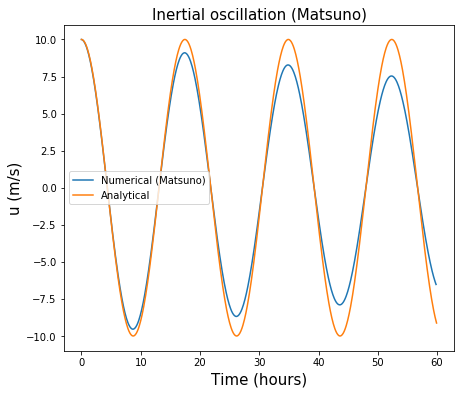

In [682]:
#Euler backward graph
plt.figure(figsize=(7,6))
plt.xlabel('Time (hours)',fontsize=15)
plt.ylabel('u (m/s)',fontsize=15)
plt.title('Inertial oscillation (Matsuno)',fontsize=15)
plt.plot(timema[0:nt_len-1]/3600, uma[0:nt_len-1],label='Numerical (Matsuno)')
plt.plot(time/3600, u_ana,label='Analytical')
plt.legend()
plt.show()

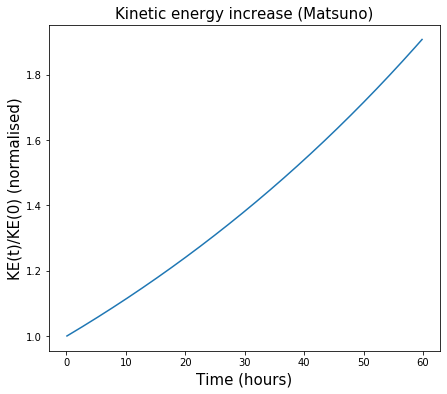

In [416]:
#Matsuno energy graph

plt.figure(figsize=(7,6))
plt.title('Kinetic energy increase (Matsuno)',fontsize=15)
plt.plot(time[1:719]/3600,KEma[1:719]/50)
plt.ylabel('KE(t)/KE(0) (normalised)',fontsize=15)
plt.xlabel('Time (hours)',fontsize=15)
plt.show()

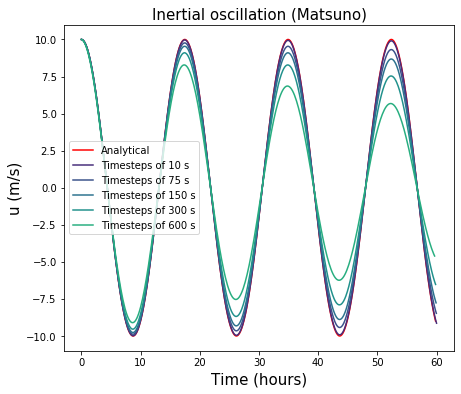

In [607]:
# For 5 different time steps:
plt.figure(figsize=(7,6))
plt.xlabel('Time (hours)',fontsize=15)
plt.ylabel('u (m/s)',fontsize=15)
plt.title('Inertial oscillation (Matsuno)',fontsize=15)
colors = plt.cm.viridis(np.linspace(0, 1, 9))
plt.plot(time[0:719]/3600, u_ana[0:719],'red',label='Analytical')
timesteps=[10,75,150,300,600]
KEmalist=[]
count=0
for dt in timesteps:
    count=count+1
    nt_len=int(60*3600/dt)
    timema = np.zeros((nt_len)) #an array for the time steps
    uma = np.zeros((nt_len))
    vma = np.zeros((nt_len))
    KEma = np.zeros((nt_len))
    uma[0]=10.0
    
    for nt in range(1,nt_len):
        timema[nt] = timema[nt-1]+dt  
        uma[nt] = uma[nt-1] + (fCor * vma[nt-1] * dt)
        vma[nt] = vma[nt-1] - (fCor * uma[nt-1] * dt)
        uma[nt] = uma[nt-1] + (fCor * vma[nt] * dt)
        vma[nt] = vma[nt-1] - (fCor * uma[nt] * dt)
        KEma[nt] = .5*(vma[nt]**2+uma[nt]**2) 
    KEmalist.append(KEma[nt_len-2])
    plt.plot(timema[0:nt_len-1]/3600, uma[0:nt_len-1],color=colors[count],label='Timesteps of '+str(dt)+' s')

plt.legend()
plt.show()

In [683]:
xdata=np.array(timesteps)
ydatama=np.array(KEmalist)*2
xlist=np.arange(2,600,1)

def fit3(x,a,b,c,d):
    return a+b*x+c*x**2+d*x**3
popt3, pcov3 = curve_fit(fit3,xdata,ydatama,p0=[0,0,0,0])
residuals3 = ydatama- fit3(xdata, *popt3)
ss_res3 = np.sum(residuals3**2)
ss_tot3 = np.sum((ydatama-np.mean(ydatama))**2)
r_squared3 = 1 - (ss_res3 / ss_tot3)

def fit4(x,a,b):
    return a+b*x
popt4, pcov4 = curve_fit(fit4,xdata,ydatama,p0=[0,1])
residuals4 = ydatama- fit4(xdatama, *popt4)
ss_res4 = np.sum(residuals4**2)
ss_tot4 = np.sum((ydatama-np.mean(ydatama))**2)
r_squared4 = 1 - (ss_res4 / ss_tot4)



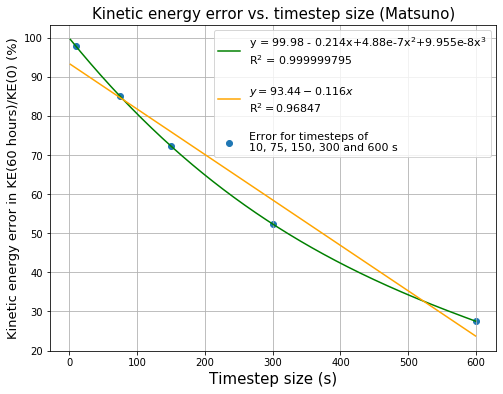

In [690]:
plt.figure(figsize=(8,6))
plt.title('Kinetic energy error vs. timestep size (Matsuno)',fontsize=15)
plt.scatter(xdata,ydatama, label='Error for timesteps of \n10, 75, 150, 300 and 600 s')
plt.plot(xlist,fit3(xlist,*popt3),'green',label='y = 99.98 - 0.214x+4.88e‐7x$^2$+9.955e‐8x$^3$\nR$^{2}$ = 0.999999795')
plt.plot(xlist,fit4(xlist,*popt4),'orange',label='\n$y=93.44-0.116x$ \nR$^2=0.96847$\n')
plt.xlabel('Timestep size (s)',fontsize=15)
plt.ylabel('Kinetic energy error in KE(60 hours)/KE(0) (%)',fontsize=13)
# these are matplotlib.patch.Patch properties
#props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
#textbox='$y=a+bx+cx^2+dx^3$ \n a=100, b=1.57e-6, \n $c=4.88e-7$, d=1.19e-11 \n $R^{2}$=0.96847'
# place a text box in upper left in axes coords
#plt.text(270, 100.19, textbox, fontsize=11,
#        verticalalignment='top', horizontalalignment='right', bbox=props)
plt.legend(fontsize=11)
#add text with custom font
plt.grid()
plt.show()

#You can get the residual sum of squares (ss_tot) with

In [663]:
r_squared4

0.968471471355055

In [731]:
#Heun's backward time loop
uH = np.zeros((nt_len))
vH = np.zeros((nt_len))
KEH = np.zeros((nt_len-1))

uH[0]=10.0

for nt in range(1,nt_len-1):
    time[nt] = time[nt-1]+dt  
    uH[nt] = uH[nt-1] + (fCor * vH[nt-1] * dt)
    vH[nt] = vH[nt-1] - (fCor * uH[nt-1] * dt)
    uH[nt] = uH[nt-1] + (fCor * (vH[nt]+vH[nt-1]) * dt)/2
    vH[nt] = vH[nt-1] - (fCor * (uH[nt]+uH[nt-1]) * dt)/2
    KEH[nt] = .5*(vH[nt]**2+uH[nt]**2)

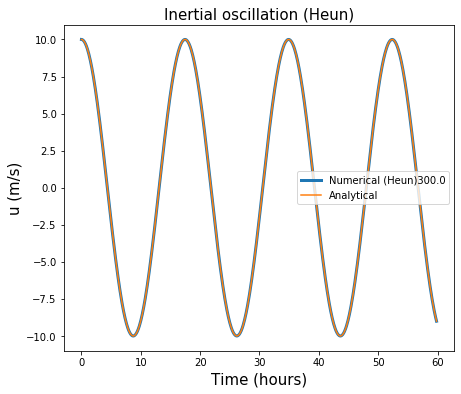

In [732]:
#Heun's graph
plt.figure(figsize=(7,6))
plt.xlabel('Time (hours)',fontsize=15)
plt.ylabel('u (m/s)',fontsize=15)
plt.title('Inertial oscillation (Heun)',fontsize=15)
plt.plot(time[0:719]/3600, uH[0:719],label='Numerical (Heun)'+str(dt), linewidth=3)
plt.plot(time[0:719]/3600, u_ana[0:719],label='Analytical')
plt.legend()
plt.show()

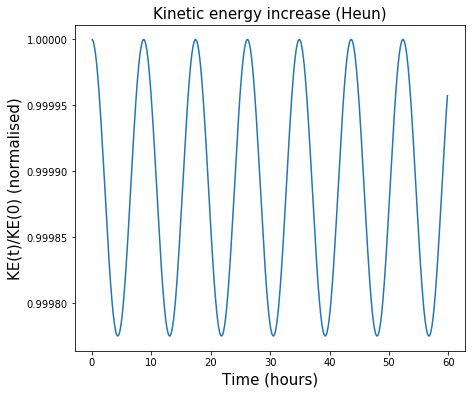

In [680]:
#Heun energy graph

plt.figure(figsize=(7,6))
plt.title('Kinetic energy increase (Heun)',fontsize=15)
plt.plot(time[1:719]/3600,KEH[1:719]/50)
plt.ylabel('KE(t)/KE(0) (normalised)',fontsize=15)
plt.xlabel('Time (hours)',fontsize=15)
plt.show()

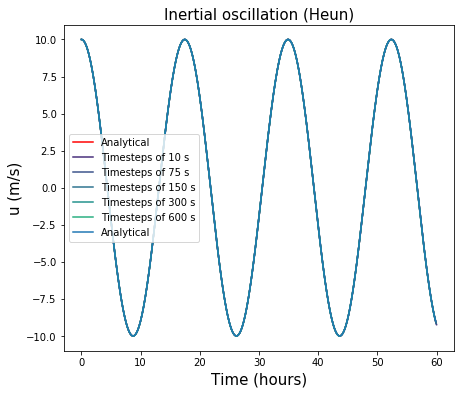

In [699]:
# For 5 different time steps:
plt.figure(figsize=(7,6))
plt.xlabel('Time (hours)',fontsize=15)
plt.ylabel('u (m/s)',fontsize=15)
plt.title('Inertial oscillation (Heun)',fontsize=15)
colors = plt.cm.viridis(np.linspace(0, 1, 9))
plt.plot(time[0:719]/3600, u_ana[0:719],'red',label='Analytical')
count=0
timesteps=[10,75,150,300,600]
KEHlist=[]
for dt in timesteps:
    count=count+1
    nt_len=int(60*3600/dt)
    timeH = np.zeros((nt_len)) #an array for the time steps
    uH = np.zeros((nt_len))
    vH = np.zeros((nt_len))
    KEH = np.zeros((nt_len-1))

    uH[0]=10.0

    for nt in range(1,nt_len-1):
        timeH[nt] = timeH[nt-1]+dt  
        uH[nt] = uH[nt-1] + (fCor * vH[nt-1] * dt)
        vH[nt] = vH[nt-1] - (fCor * uH[nt-1] * dt)
        uH[nt] = uH[nt-1] + (fCor * (vH[nt]+vH[nt-1]) * dt)/2
        vH[nt] = vH[nt-1] - (fCor * (uH[nt]+uH[nt-1]) * dt)/2
        KEH[nt] = .5*(vH[nt]**2+uH[nt]**2)   
    KEHlist.append(KEH[nt_len-2])
    plt.plot(timeH[0:nt_len-1]/3600, uH[0:nt_len-1],color=colors[count],label='Timesteps of '+str(dt)+' s')
plt.plot(time[0:719]/3600, u_ana[0:719],label='Analytical')
plt.legend()
plt.show()

In [716]:
xdata=np.array(timesteps)
ydataH=np.array(KEHlist)*2
xlist=np.arange(2,600,1)

def fit5(x,a,b,c,d):
    return a+b*x+c*x**2+d*x**3
popt5, pcov5 = curve_fit(fit5,xdata,ydataH,p0=[0,0,0,0])
residuals5 = ydataH- fit5(xdata, *popt5)
ss_res5 = np.sum(residuals5**2)
ss_tot5 = np.sum((ydataH-np.mean(ydataH))**2)
r_squared5 = 1 - (ss_res5 / ss_tot5)

def fit6(x,a,b):
    return a+b*x
popt6, pcov6 = curve_fit(fit6,xdata,ydataH,p0=[0,1])
residuals6 = ydataH- fit6(xdata, *popt6)
ss_res6 = np.sum(residuals6**2)
ss_tot6 = np.sum((ydataH-np.mean(ydataH))**2)
r_squared6 = 1 - (ss_res6 / ss_tot6)



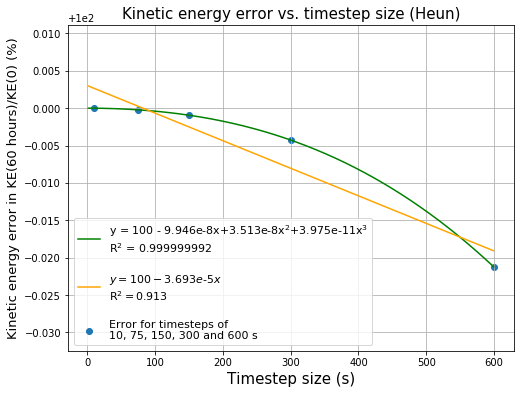

In [725]:
plt.figure(figsize=(8,6))
plt.title('Kinetic energy error vs. timestep size (Heun)',fontsize=15)
plt.scatter(xdata,ydataH, label='Error for timesteps of \n10, 75, 150, 300 and 600 s')
plt.plot(xlist,fit5(xlist,*popt5),'green',label='y = 100 - 9.946e‐8x+3.513e‐8x$^2$+3.975e‐11x$^3$\nR$^{2}$ = 0.999999992')
plt.plot(xlist,fit6(xlist,*popt6),'orange',label='\n$y=100-3.693e‐5x$ \nR$^2=0.913$\n')
plt.xlabel('Timestep size (s)',fontsize=15)
plt.ylabel('Kinetic energy error in KE(60 hours)/KE(0) (%)',fontsize=13)

plt.legend(fontsize=11)
plt.grid()
plt.show()

In [719]:
popt6[1]

-3.6928779274969514e-05

In [721]:
r_squared6

0.9126207639945227